In [2]:
import pandas as pd 
from zipfile import ZipFile

import sklearn.linear_model
#import tensorflow as tf 
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from xgboost import XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

# model selection
from sklearn.model_selection import train_test_split,RandomizedSearchCV

# data preprocessing 
from sklearn.preprocessing import StandardScaler


# metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report


# viusalisation
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import scipy.stats as stats




## Data Cleaning




In [135]:
data_file="waterQuality1.csv"
df=pd.read_csv(data_file,encoding="utf-8")

In [136]:
df.head(3)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0


In [137]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [138]:
missing=df.loc[(df["ammonia"]=='#NUM!') | (df["is_safe"]=='#NUM!')]
indices=missing.index
df.drop(axis=0,index=indices,inplace=True)

In [139]:
df['ammonia']=df['ammonia'].astype(np.float64)
df['is_safe']=df['is_safe'].astype(np.float64)

In [140]:
# checking duplicated rows
df.duplicated().sum()

0

In [141]:
df.to_csv("cleaned_data.csv",index=False)


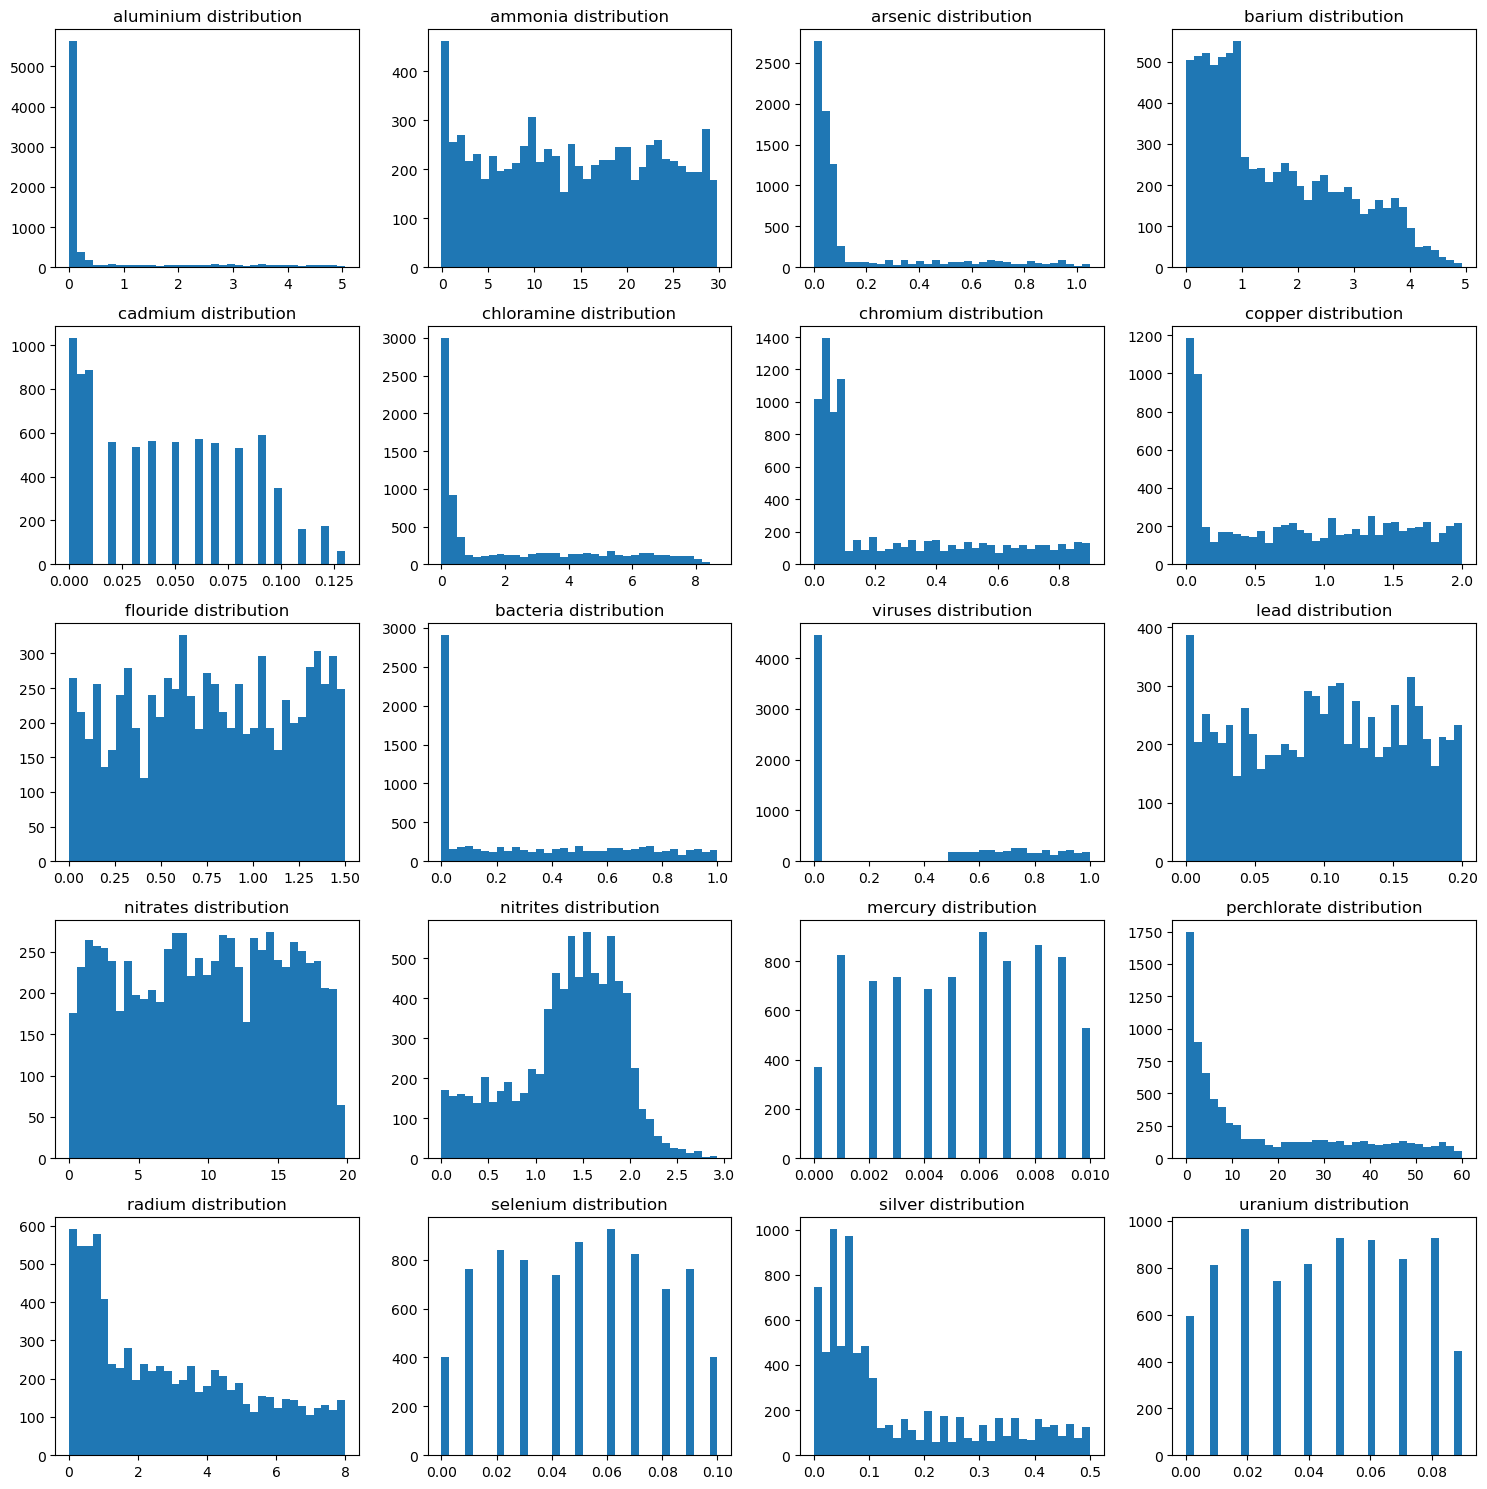

In [142]:
# distribution of data

fig,axes=plt.subplots(nrows=5,ncols=4,figsize=(15, 15))

for i,col in enumerate(df.columns[:-1]):
    row = i // 4
    colnum = i % 4
    axes[row,colnum].hist(x=df[col].to_numpy(),bins=35)
    axes[row,colnum].set_title(f'{col} distribution')

plt.tight_layout()
plt.show()

In [143]:
# scaling Features
scaler=StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:,:-1]), columns=df.columns[:-1])
df_scaled['is_safe']=df['is_safe']


In [144]:
df_scaled.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7.996000e+03,7.996000e+03,7.996000e+03,7996.000000,7.996000e+03,7996.000000,7996.000000,7.996000e+03,7.996000e+03,7.996000e+03,...,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7993.000000
mean,-1.421796e-16,1.706156e-16,-5.687185e-17,0.000000,-3.270132e-16,0.000000,0.000000,-8.530778e-17,1.328491e-16,5.687185e-17,...,1.635066e-16,1.306275e-16,1.990515e-16,-5.042934e-17,1.137437e-16,-8.530778e-17,-1.766138e-17,-1.706156e-16,-1.057461e-16,0.113725
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063,1.000063e+00,1.000063,1.000063,1.000063e+00,1.000063e+00,1.000063e+00,...,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,0.317496
min,-5.266934e-01,-1.617212e+00,-6.392174e-01,-1.289254,-1.187431e+00,-0.848285,-0.913738,-1.233166e+00,-1.772284e+00,-9.703699e-01,...,-1.709466e+00,-1.771906e+00,-2.319897e+00,-1.750143e+00,-9.308869e-01,-1.257225e+00,-1.726831e+00,-1.029616e+00,-1.660415e+00,0.000000
25%,-4.950790e-01,-8.673560e-01,-5.204604e-01,-0.828785,-9.654992e-01,-0.809330,-0.728995,-1.095458e+00,-8.363551e-01,-9.703699e-01,...,-8.842252e-01,-8.696448e-01,-5.754118e-01,-7.390054e-01,-8.082029e-01,-9.041816e-01,-1.031700e+00,-7.509865e-01,-9.170402e-01,0.000000
50%,-4.713681e-01,-1.669355e-02,-4.412891e-01,-0.310757,-7.777062e-02,-0.641822,-0.581200,-8.559428e-02,-3.780058e-03,-3.026430e-01,...,4.417030e-02,1.998516e-02,1.572720e-01,-6.491377e-02,-4.930124e-01,-2.196216e-01,1.099726e-02,-4.723568e-01,1.980227e-01,0.000000
75%,-3.053922e-01,8.846538e-01,-2.433608e-01,0.752022,7.544749e-01,0.803417,0.711999,8.936671e-01,8.919559e-01,8.810548e-01,...,8.866032e-01,8.645020e-01,7.503970e-01,9.462236e-01,7.362302e-01,7.534008e-01,7.061287e-01,6.421620e-01,9.413979e-01,0.000000
max,3.464632e+00,1.752774e+00,3.517278e+00,2.772741,2.418966e+00,2.533030,2.411633,1.827026e+00,1.672854e+00,2.064753e+00,...,1.729036e+00,1.806463e+00,2.791445e+00,1.620315e+00,2.461862e+00,2.182796e+00,1.748826e+00,2.453255e+00,1.684773e+00,1.000000


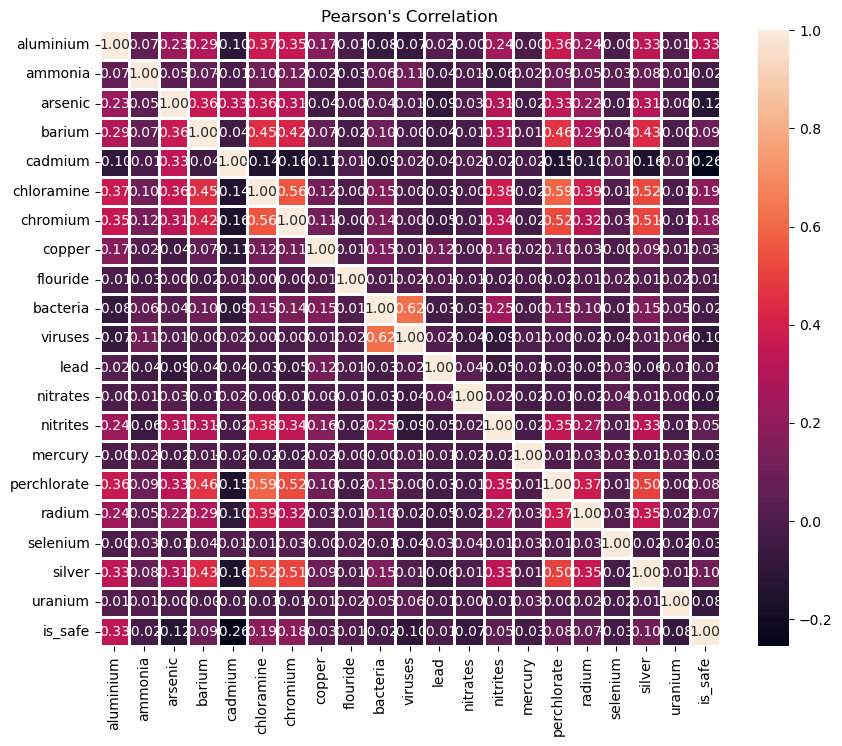

In [145]:
# Correlation: Linear Relationship (Pearson's correlation C= covariance(X, Y) / (stdv(X) * stdv(Y))) 

pearson_corr=df_scaled.corr('pearson')
plt.figure(figsize=(10,8))
sns.heatmap(pearson_corr,annot=True,fmt='.2f', linewidths=1)
plt.title("Pearson's Correlation")
plt.show()


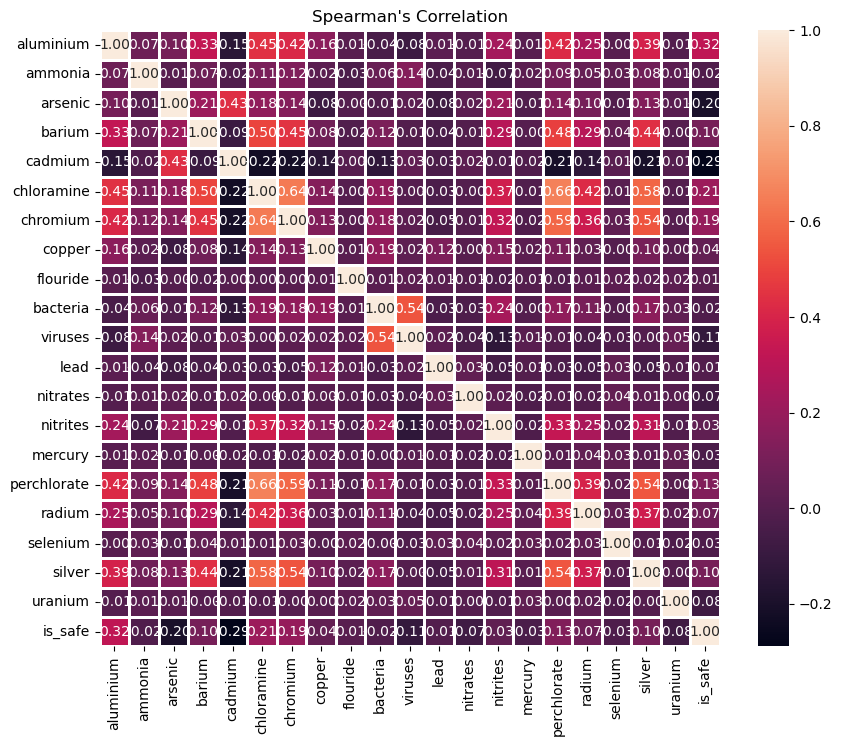

In [146]:
# Correlation Spearman’s Correlation (For non linear relationships)
Spearman_corr= df_scaled.corr('spearman')
plt.figure(figsize=(10,8))
sns.heatmap(Spearman_corr,annot=True,fmt='.2f', linewidths=1)
plt.title("Spearman's Correlation")
plt.show()

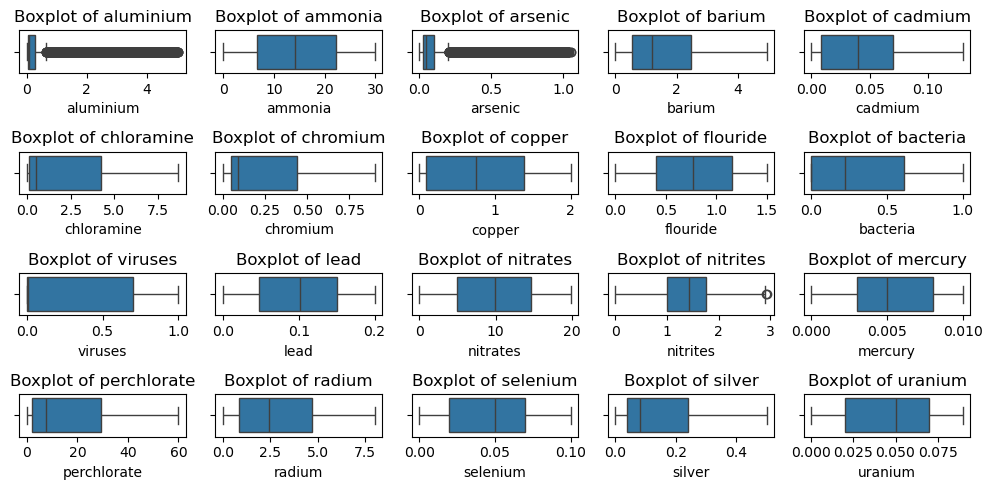

In [147]:
# checking for outliers
fig,axes=plt.subplots(ncols=5,nrows=4,figsize=(10,5))
for i,column in enumerate(df.columns[:-1]):
    row = i // 5
    col = i % 5
    sns.boxplot(x=df[column], ax=axes[row, col])
    
    axes[row, col].set_title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [148]:
# Cleaning outliers using boxplot
outliers_indexes=df_scaled.loc[(df_scaled['arsenic']>3) | (df_scaled['aluminium']>3) | (df_scaled['arsenic']>3) ].index
clean_data=df_scaled.drop(axis=0,index=outliers_indexes)
clean_data.reset_index(inplace=True,drop=True)

In [149]:
z_score=stats.zscore(clean_data,axis=1)
z_score

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.582474,-0.697361,-0.599120,0.842407,-1.080260,-0.816104,1.874231,-1.061300,-1.703987,-0.488753,...,-0.881020,0.913364,-0.474933,0.424501,0.982474,1.413013,0.841928,1.109598,-1.008704,0.791506
1,1.013426,0.381213,-1.253031,1.162617,-1.885827,0.896460,1.360329,-0.805668,-0.189771,0.651467,...,-0.528582,-2.215408,0.704366,-1.418713,0.521319,-0.391845,0.712372,0.471577,-0.304814,0.648543
2,0.134967,-0.169615,-0.627308,-0.963103,-1.118263,0.673760,0.918028,-1.358425,0.367906,-0.969459,...,-0.513415,0.653378,-0.528680,0.135535,1.796584,1.669886,0.575201,1.921745,-1.445714,-0.140152
3,0.382628,-0.449246,-0.589874,0.946296,-1.231373,1.724549,-0.894189,1.099522,0.533849,0.984015,...,-1.490968,-1.569484,-0.201124,-0.515297,-0.527880,-0.623725,-1.110419,1.853819,0.051703,0.809594
4,0.586109,1.857259,-0.397410,-1.221909,-1.080270,0.574350,2.544246,-0.179875,-0.193859,-0.472915,...,0.724747,-0.445430,-0.210581,-0.695570,0.346183,0.013022,-1.094892,-0.521849,-0.938462,1.676946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7609,-0.411125,-0.698111,-0.589413,0.528540,0.068950,-0.788889,-0.781340,-1.232060,1.771643,-0.977728,...,2.127161,1.106162,-0.514593,0.084026,-0.694754,-0.238748,1.803286,-0.557112,-0.479345,1.332762
7610,-0.220294,1.495793,-0.298114,-0.558761,-0.671852,-0.418724,-0.596910,-0.984269,2.037378,-0.736305,...,-0.956432,0.386831,-0.314523,-1.209100,-0.604784,-0.532285,1.796394,-0.055693,1.702231,1.367882
7611,-0.060373,-0.500715,-0.272578,-0.444108,0.055605,-0.491638,-0.376310,-0.923493,0.833163,-0.655206,...,2.106236,1.738023,-0.198854,-1.556189,-0.521397,1.421083,-1.529254,-0.401721,0.694806,1.621446
7612,0.641825,0.689745,0.536900,1.776285,-0.226010,1.225377,0.129220,-0.106636,-0.985095,0.055716,...,-0.903562,-0.984604,-1.695846,-0.956357,0.106961,-0.316596,-0.926101,-0.021180,-0.839899,2.613074


In [150]:
# cleaning outliers using Z_score
def detect_outliers(data):
    
 z_score=stats.zscore(data.values,axis=1)
 outliers=set()
 for index,example in enumerate(z_score):
     if any(np.abs(feature) > 3 for feature in example):
         outliers.add(index)
 return outliers

outliers_indices=detect_outliers(clean_data)
print(f" number of outliers found using Z-score method: {len(outliers_indices)}")

 number of outliers found using Z-score method: 69


In [151]:
clean_data.drop(axis=0,index=outliers_indices,inplace=True)


In [152]:
print(f"Number of outliers found using boxplot filtering method: {len(outliers_indexes)}")
print(f"percentage of outliers with respect to the whole dataset: {len(outliers_indexes)*100/len(df):.2f}%")
print(f"Number of outliers found using Z-score filtering method: {len(outliers_indices)}")
print(f"Percentage of outliers with respect to the whole dataset {len(outliers_indices)*100/len(df):.2f}%")
print(f"Total percentage of outliers data points {(len(outliers_indices)+len(outliers_indexes))*100/len(df):.2f}%")



Number of outliers found using boxplot filtering method: 382
percentage of outliers with respect to the whole dataset: 4.78%
Number of outliers found using Z-score filtering method: 69
Percentage of outliers with respect to the whole dataset 0.86%
Total percentage of outliers data points 5.64%


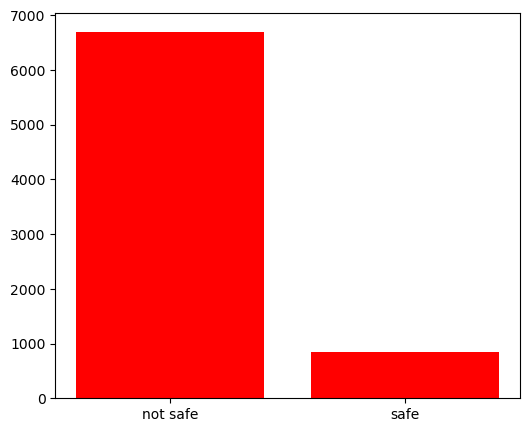

In [153]:
# visualizing the class distribution
plt.figure(figsize=(6,5))
class_distribution=clean_data['is_safe'].value_counts()

class_labels=class_distribution.index.to_numpy()
class_labels=np.where(class_labels==0,"not safe","safe")
count=class_distribution.tolist()
plt.bar(class_labels,class_distribution,align='center',color='red')
plt.show()

In [154]:
# save new data 
clean_data.to_csv("cleaned_scaled_data.csv",index=False)

In [155]:
## Modeling 


In [156]:
df=pd.read_csv('cleaned_scaled_data.csv',delimiter=',')


In [157]:
indices=df[df['is_safe'].isna()].index
df.drop(axis=0,index=indices,inplace=True)

In [158]:
df['is_safe'].isna().sum()

0

In [13]:
df.to_csv('cleaned_scaled_data2.csv')

NameError: name 'df' is not defined

In [3]:
df=pd.read_csv("cleaned_scaled_data2.csv",delimiter=',')

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.777403,-0.585491,-0.480875,1.054205,-0.993241,-0.711941,2.152993,-0.973050,-1.657446,-0.363345,...,-0.781070,1.129767,-0.348629,0.609178,1.203362,1.661842,1.053694,1.338736,-0.917040,1.0
1,1.306945,0.775118,-0.599632,1.432447,-1.131948,1.208552,1.598765,-0.223303,0.294799,1.002460,...,0.009785,-1.409197,1.046960,-0.739005,0.892977,0.124811,1.053694,0.851134,0.198023,1.0
2,0.271572,-0.029083,-0.480875,-0.812340,-0.965499,0.803417,1.044536,-1.202564,0.501507,-0.818614,...,-0.368450,0.783298,-0.383518,0.272132,1.911763,1.786699,0.706129,2.035310,-1.288728,0.0
3,0.548198,-0.332067,-0.480875,1.144654,-1.159690,1.968179,-0.802892,1.306793,0.708215,1.184567,...,-1.434385,-1.517469,-0.069511,-0.401960,-0.415275,-0.516695,-1.031700,2.104968,0.198023,1.0
4,0.200439,1.132165,-0.520460,-1.124801,-1.020982,0.191820,1.635713,-0.361012,-0.371261,-0.575804,...,0.302058,-0.555658,-0.383518,-0.739005,0.024578,-0.219622,-1.031700,-0.611672,-0.917040,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7537,-0.487175,-0.731915,-0.639217,0.314165,-0.077771,-0.809330,-0.802892,-1.187263,1.374275,-0.970370,...,1.677459,0.806757,-0.575412,-0.064914,-0.729052,-0.340173,1.401260,-0.611672,-0.545353,1.0
7538,-0.487175,1.119776,-0.560046,-0.804117,-0.910016,-0.672986,-0.839840,-1.202564,1.626919,-0.970370,...,-1.176498,0.081339,-0.575412,-1.413097,-0.847213,-0.779325,1.401260,-0.333042,1.313085,1.0
7539,-0.455561,-0.836663,-0.639217,-0.787672,-0.355186,-0.828807,-0.728995,-1.202564,0.317766,-0.970370,...,1.419571,1.100895,-0.575412,-1.750143,-0.854563,0.826593,-1.726831,-0.750986,0.198023,1.0
7540,-0.518790,-0.481869,-0.599632,0.355278,-1.187431,-0.069180,-0.913738,-1.095458,-1.772284,-0.970370,...,-1.709466,-1.771906,-2.319897,-1.750143,-0.930887,-1.257225,-1.726831,-1.029616,-1.660415,1.0


In [6]:
# Creating testing and training sets:
X=df.iloc[:,:-1].to_numpy()
y=df['is_safe'].to_numpy()

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,train_size=.8)
print(f"Shape of x_train : {x_train.shape} ")
print(f"Shape of y_train: {y_train.shape} ")
print(f"Shape of x_test : {x_test.shape} ")
print(f"Shape of y_test: {y_test.shape} ")

Shape of x_train : (6033, 20) 
Shape of y_train: (6033,) 
Shape of x_test : (1509, 20) 
Shape of y_test: (1509,) 


In [8]:
# L1 regularization with SGD
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log_loss',penalty='l1',fit_intercept=True,early_stopping=True,n_iter_no_change=20)
sgd.fit(x_train,y_train)



SGDClassifier(early_stopping=True, loss='log_loss', n_iter_no_change=20,
              penalty='l1')

In [23]:
train_predictions=sgd.predict(x_train)
test_predictions=sgd.predict(x_test)
print(f"training accuracy: {accuracy_score(train_predictions,y_train)}")
print(f"test accuracy {accuracy_score(test_predictions,y_test)}")
print("Classification report for testing data ")
print(classification_report(y_test,test_predictions))



training accuracy: 0.9133101276313609
test accuracy 0.8939695162359178
Classification report for testing data 
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1341
         1.0       0.55      0.28      0.37       168

    accuracy                           0.89      1509
   macro avg       0.73      0.63      0.66      1509
weighted avg       0.87      0.89      0.88      1509


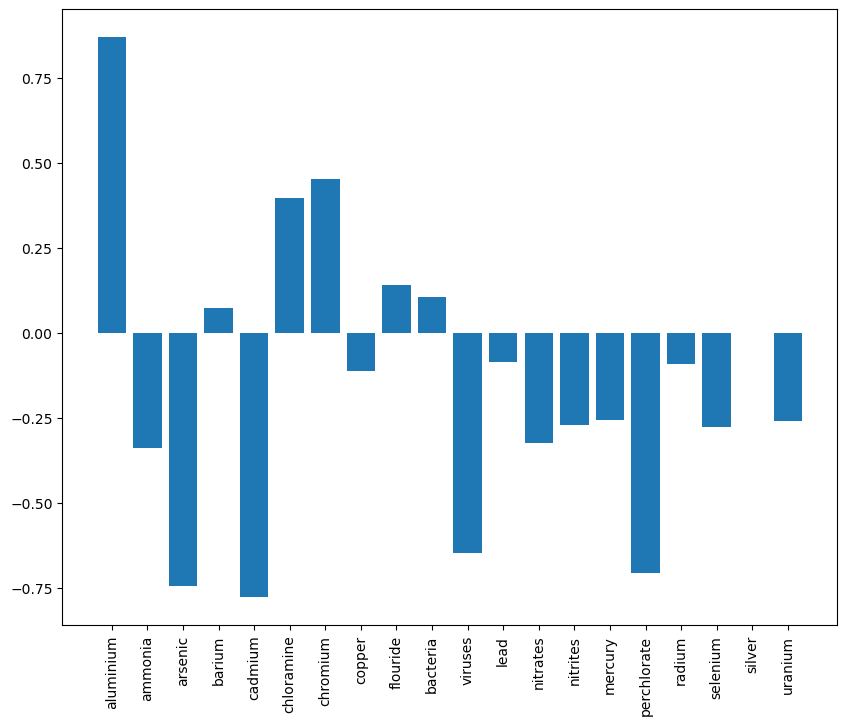

In [167]:
def visualize_coef(model):
 coefs = model.coef_.flatten()
 cols=clean_data.columns[:-1].to_numpy()
 plt.figure(figsize=(10,8))
 plt.bar(cols,coefs)
 plt.xticks(rotation=90)
 plt.show()

visualize_coef(sgd) 

In [168]:
## finding the best regularization param alpha using a greedy search 
models=[]
models_scores=[]
alphas=np.logspace(-6,6,20)
for alpha in alphas:
    model=SGDClassifier(loss='log_loss',penalty='l1',n_jobs=-1,alpha=alpha)
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    models_scores.append(accuracy_score(y_test,predictions))
    models.append(model)


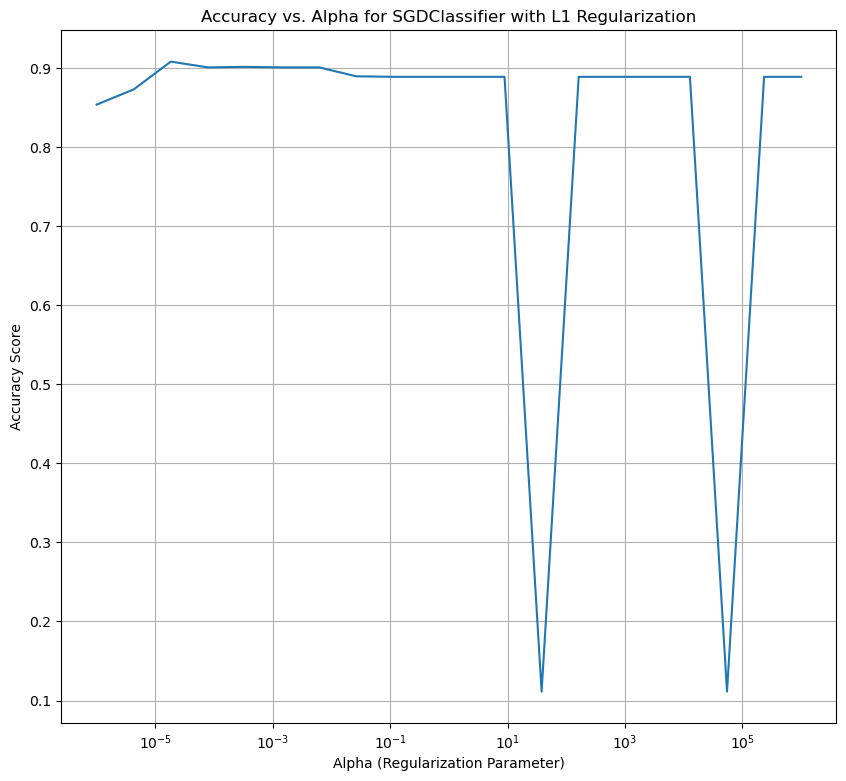

In [169]:
#plotting the results
plt.figure(figsize=(10,9))
plt.plot(alphas,models_scores)
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs. Alpha for SGDClassifier with L1 Regularization')
plt.grid(True)
plt.show()

In [170]:
best_score_idx=np.argmax(models_scores)
best_model=models[best_score_idx]
best_score=models_scores[best_score_idx]
best_alpha=alphas[best_score_idx]
print(f"best model score: {best_score} for the value of alpha {best_alpha}")



best model score: 0.9078860172299537 for the value of alpha 1.8329807108324375e-05


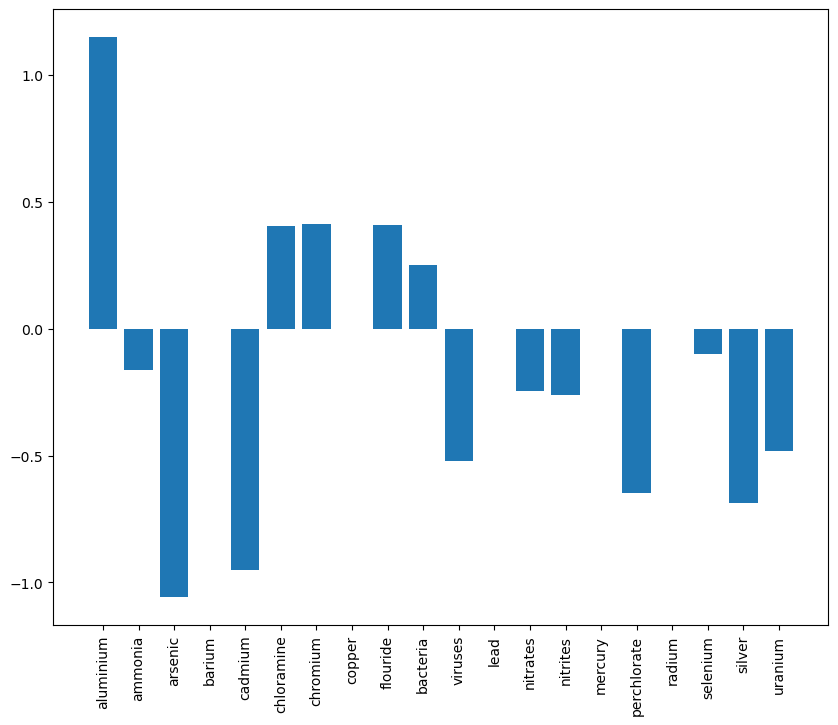

In [171]:
visualize_coef(best_model)

In [172]:
## retraining the model with the non nul features
non_null_feature_idx=np.where(best_model.coef_[0]!=0)[0].tolist()
x_train_after_fs=x_train[:,non_null_feature_idx]
x_test_after_fs=x_test[:,non_null_feature_idx]




In [173]:
sgd_after_fs=SGDClassifier(loss='log_loss',fit_intercept=True)
sgd_after_fs.fit(x_train_after_fs,y_train)
predictions=sgd_after_fs.predict(x_test_after_fs)
acc_after_fs=accuracy_score(predictions,y_test)
acc_after_fs

0.9025844930417495

In [174]:
print(classification_report(y_test,predictions))
print(f1_score(predictions,y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      1341
         1.0       0.66      0.26      0.37       168

    accuracy                           0.90      1509
   macro avg       0.79      0.62      0.66      1509
weighted avg       0.89      0.90      0.88      1509

0.37446808510638296


In [175]:
## comparing with the xgboost classifier
from sklearn.model_selection import RandomizedSearchCV

depth=np.linspace(3,18,2).astype(np.int8)
learning_rate=[0.05,0.10,0.15,0.20,0.25,0.30,0.35]
device=['cuda']
gamma=[0,.1,.2,.3,.4]
alpha=np.linspace(0,1e-3,10).tolist()
objectif=['binary:logistic']
eta=[0.3,0,4,.5,.6]

param = {'max_depth': depth, 'eta': eta, 'objective': objectif,'gamma':gamma ,'device':device,'learning_rate':learning_rate}
xgb=XGBClassifier()
random_search=RandomizedSearchCV(estimator=xgb,
                                 param_distributions=param,
                                 n_jobs=-1,
                                 cv=5,
                                 scoring='accuracy',
                                 verbose=2
                                )

In [176]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[11:21:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "device" } are not used.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'device': ['cuda'],
                                        'eta': [0.3, 0, 4, 0.5, 0.6],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35],
                                        'max_depth': array([ 3, 18], dtype=int8),
                                        'objective': ['binary:logistic']},
                   scoring='accuracy', verbose=2)

In [177]:

best_params=random_search.best_params_
best_estimator=random_search.best_estimator_
pred=best_estimator.predict(x_test)



ImportError: You must install graphviz to plot tree

<Figure size 2000x1000 with 0 Axes>

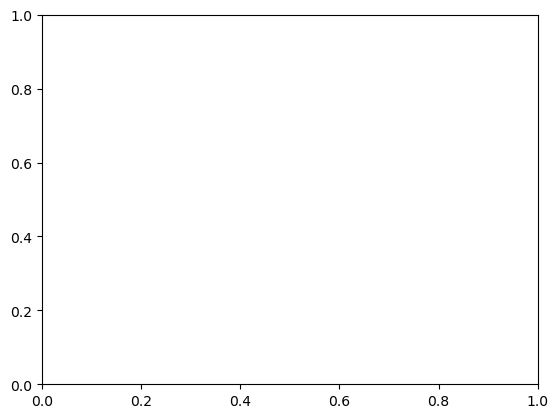

In [271]:
import xgboost as xgb
plt.figure(figsize=(20, 10))
xgb.plot_tree(best_estimator, num_trees=0)
plt.show()

In [178]:
test_score=accuracy_score(pred,y_test)
test_score

0.9681908548707754

In [179]:
f1_score(pred,y_test)

0.8481012658227848

In [10]:
## Comparing with a CNN
from sklearn.metrics import f1_score
import tensorflow as tf
import keras 
from keras.layers import Dense,AveragePooling1D,Conv2D,Flatten,Conv1D,Input,Dropout
from keras.models import Sequential
from keras.metrics import Accuracy,Precision,Recall

def f1_metric(y_true, y_pred):
    y_pred = tf.round(y_pred)

    def f1_score_func(y_true, y_pred):
        return f1_score(y_true, y_pred,average='micro' )

    f1 = tf.py_function(f1_score_func, (y_true, y_pred), tf.float32)
    return f1


In [26]:
## create data generator
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.reshape(y_train.shape[0],1)
training_generator=tf.data.Dataset.from_tensor_slices((x_train,y_train))
validation_generator=tf.data.Dataset.from_tensor_slices((x_test,y_test))

## shuffle and batch data
training_generator= training_generator.shuffle(buffer_size=len(x_train)).batch(batch_size=32).prefetch(tf.data.experimental.AUTOTUNE)
validation_generator=validation_generator.batch(batch_size=32).prefetch(tf.data.experimental.AUTOTUNE)
    



In [27]:
y_train.shape

(6033, 1)

In [28]:
model = Sequential([
    Conv1D(filters=32, kernel_size=2, strides=1,  activation="tanh", input_shape=(20, 1)),
    AveragePooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=2,  activation="relu"),
    AveragePooling1D(pool_size=2),
    Dense(128, activation='relu'),
    Flatten(),
    Dense(1, activation="sigmoid")
])


In [31]:
model.compile(loss=tf.losses.binary_crossentropy,metrics=['accuracy',f1_metric],optimizer=tf.optimizers.Adam())

In [32]:
x_test.shape

(1509, 20, 1)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 32)            96        
                                                                 
 average_pooling1d (Average  (None, 9, 32)             0         
 Pooling1D)                                                      
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 64)             4160      
                                                                 
 average_pooling1d_1 (Avera  (None, 4, 64)             0         
 gePooling1D)                                                    
                                                                 
 dense (Dense)               (None, 4, 128)            8320      
                                                                 
 flatten (Flatten)           (None, 512)               0

In [34]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="f1_metric",patience=10)
best_model_file_path=r"./best_model.h5"
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=best_model_file_path,monitor="f1_metric",save_best_only=True,mode="max",verobse=1,)

In [35]:
history=model.fit(training_generator,validation_data=validation_generator,epochs=40,callbacks=[checkpoint])

Epoch 1/40
189/189 [==============================] - 2s 5ms/step - loss: 0.3172 - accuracy: 0.8843 - f1_metric: 0.8843 - val_loss: 0.2505 - val_accuracy: 0.9032 - val_f1_metric: 0.9049
Epoch 2/40
 32/189 [====>.........................] - ETA: 0s - loss: 0.2412 - accuracy: 0.9180 - f1_metric: 0.9180

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.2213 - accuracy: 0.9196 - f1_metric: 0.9198 - val_loss: 0.2247 - val_accuracy: 0.9145 - val_f1_metric: 0.9160
Epoch 3/40
 31/189 [===>..........................] - ETA: 0s - loss: 0.1972 - accuracy: 0.9224 - f1_metric: 0.9224

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.2095 - accuracy: 0.9214 - f1_metric: 0.9213 - val_loss: 0.2253 - val_accuracy: 0.9132 - val_f1_metric: 0.9147
Epoch 4/40
 49/189 [======>.......................] - ETA: 0s - loss: 0.2284 - accuracy: 0.9107 - f1_metric: 0.9107

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.2062 - accuracy: 0.9229 - f1_metric: 0.9228 - val_loss: 0.2266 - val_accuracy: 0.9125 - val_f1_metric: 0.9105
Epoch 5/40
 31/189 [===>..........................] - ETA: 0s - loss: 0.1826 - accuracy: 0.9365 - f1_metric: 0.9365

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1999 - accuracy: 0.9279 - f1_metric: 0.9276 - val_loss: 0.2099 - val_accuracy: 0.9165 - val_f1_metric: 0.9180
Epoch 6/40
 32/189 [====>.........................] - ETA: 0s - loss: 0.1942 - accuracy: 0.9277 - f1_metric: 0.9277

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1957 - accuracy: 0.9269 - f1_metric: 0.9269 - val_loss: 0.2100 - val_accuracy: 0.9205 - val_f1_metric: 0.9219
Epoch 7/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1882 - accuracy: 0.9317 - f1_metric: 0.9317 - val_loss: 0.2259 - val_accuracy: 0.9158 - val_f1_metric: 0.9173
Epoch 8/40
 32/189 [====>.........................] - ETA: 0s - loss: 0.1920 - accuracy: 0.9258 - f1_metric: 0.9258

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1888 - accuracy: 0.9304 - f1_metric: 0.9301 - val_loss: 0.1992 - val_accuracy: 0.9231 - val_f1_metric: 0.9245
Epoch 9/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1826 - accuracy: 0.9315 - f1_metric: 0.9314 - val_loss: 0.2017 - val_accuracy: 0.9218 - val_f1_metric: 0.9232
Epoch 10/40
189/189 [==============================] - 1s 5ms/step - loss: 0.1773 - accuracy: 0.9357 - f1_metric: 0.9357 - val_loss: 0.1931 - val_accuracy: 0.9278 - val_f1_metric: 0.9255
Epoch 11/40
 32/189 [====>.........................] - ETA: 0s - loss: 0.1604 - accuracy: 0.9385 - f1_metric: 0.9385

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1767 - accuracy: 0.9329 - f1_metric: 0.9329 - val_loss: 0.2150 - val_accuracy: 0.9258 - val_f1_metric: 0.9271
Epoch 12/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1734 - accuracy: 0.9352 - f1_metric: 0.9354 - val_loss: 0.1935 - val_accuracy: 0.9264 - val_f1_metric: 0.9277
Epoch 13/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1705 - accuracy: 0.9357 - f1_metric: 0.9358 - val_loss: 0.1926 - val_accuracy: 0.9245 - val_f1_metric: 0.9223
Epoch 14/40
 46/189 [======>.......................] - ETA: 0s - loss: 0.1827 - accuracy: 0.9280 - f1_metric: 0.9280

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1677 - accuracy: 0.9360 - f1_metric: 0.9359 - val_loss: 0.1943 - val_accuracy: 0.9245 - val_f1_metric: 0.9223
Epoch 15/40
 31/189 [===>..........................] - ETA: 0s - loss: 0.1558 - accuracy: 0.9425 - f1_metric: 0.9425

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1644 - accuracy: 0.9395 - f1_metric: 0.9394 - val_loss: 0.1909 - val_accuracy: 0.9258 - val_f1_metric: 0.9236
Epoch 16/40
 49/189 [======>.......................] - ETA: 0s - loss: 0.1697 - accuracy: 0.9343 - f1_metric: 0.9343

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1621 - accuracy: 0.9405 - f1_metric: 0.9403 - val_loss: 0.2044 - val_accuracy: 0.9211 - val_f1_metric: 0.9225
Epoch 17/40
 46/189 [======>.......................] - ETA: 0s - loss: 0.1681 - accuracy: 0.9361 - f1_metric: 0.9361

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1621 - accuracy: 0.9393 - f1_metric: 0.9393 - val_loss: 0.1819 - val_accuracy: 0.9298 - val_f1_metric: 0.9275
Epoch 18/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1590 - accuracy: 0.9397 - f1_metric: 0.9398 - val_loss: 0.2038 - val_accuracy: 0.9218 - val_f1_metric: 0.9232
Epoch 19/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1594 - accuracy: 0.9410 - f1_metric: 0.9410 - val_loss: 0.1898 - val_accuracy: 0.9324 - val_f1_metric: 0.9336
Epoch 20/40
 32/189 [====>.........................] - ETA: 0s - loss: 0.1612 - accuracy: 0.9326 - f1_metric: 0.9326

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1545 - accuracy: 0.9393 - f1_metric: 0.9395 - val_loss: 0.1843 - val_accuracy: 0.9331 - val_f1_metric: 0.9342
Epoch 21/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1529 - accuracy: 0.9441 - f1_metric: 0.9441 - val_loss: 0.1834 - val_accuracy: 0.9351 - val_f1_metric: 0.9362
Epoch 22/40
 32/189 [====>.........................] - ETA: 0s - loss: 0.1394 - accuracy: 0.9463 - f1_metric: 0.9463

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1523 - accuracy: 0.9422 - f1_metric: 0.9423 - val_loss: 0.1828 - val_accuracy: 0.9317 - val_f1_metric: 0.9329
Epoch 23/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1496 - accuracy: 0.9428 - f1_metric: 0.9427 - val_loss: 0.1825 - val_accuracy: 0.9331 - val_f1_metric: 0.9307
Epoch 24/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1486 - accuracy: 0.9445 - f1_metric: 0.9446 - val_loss: 0.1780 - val_accuracy: 0.9311 - val_f1_metric: 0.9288
Epoch 25/40
 47/189 [======>.......................] - ETA: 0s - loss: 0.1423 - accuracy: 0.9468 - f1_metric: 0.9468

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1482 - accuracy: 0.9426 - f1_metric: 0.9426 - val_loss: 0.2001 - val_accuracy: 0.9192 - val_f1_metric: 0.9171
Epoch 26/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1473 - accuracy: 0.9417 - f1_metric: 0.9418 - val_loss: 0.1783 - val_accuracy: 0.9344 - val_f1_metric: 0.9355
Epoch 27/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1457 - accuracy: 0.9431 - f1_metric: 0.9430 - val_loss: 0.1820 - val_accuracy: 0.9351 - val_f1_metric: 0.9362
Epoch 28/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1444 - accuracy: 0.9445 - f1_metric: 0.9443 - val_loss: 0.1999 - val_accuracy: 0.9225 - val_f1_metric: 0.9238
Epoch 29/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1443 - accuracy: 0.9428 - f1_metric: 0.9430 - val_loss: 0.1798 - val_accuracy: 0.9337 - val_f1_metric: 0.9349
Epoch 30/40
189/189 [==============================] - 1s 4ms/step - loss: 0.

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1415 - accuracy: 0.9446 - f1_metric: 0.9446 - val_loss: 0.1772 - val_accuracy: 0.9311 - val_f1_metric: 0.9323
Epoch 32/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1372 - accuracy: 0.9461 - f1_metric: 0.9461 - val_loss: 0.1812 - val_accuracy: 0.9331 - val_f1_metric: 0.9342
Epoch 33/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1384 - accuracy: 0.9468 - f1_metric: 0.9466 - val_loss: 0.1817 - val_accuracy: 0.9317 - val_f1_metric: 0.9329
Epoch 34/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1376 - accuracy: 0.9466 - f1_metric: 0.9468 - val_loss: 0.1803 - val_accuracy: 0.9324 - val_f1_metric: 0.9336
Epoch 35/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1358 - accuracy: 0.9481 - f1_metric: 0.9481 - val_loss: 0.1844 - val_accuracy: 0.9351 - val_f1_metric: 0.9362
Epoch 36/40
 50/189 [======>.......................] - ETA: 0s - loss: 0.1515

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 5ms/step - loss: 0.1330 - accuracy: 0.9491 - f1_metric: 0.9489 - val_loss: 0.1873 - val_accuracy: 0.9245 - val_f1_metric: 0.9258
Epoch 37/40
 31/189 [===>..........................] - ETA: 0s - loss: 0.1282 - accuracy: 0.9466 - f1_metric: 0.9466

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1337 - accuracy: 0.9465 - f1_metric: 0.9462 - val_loss: 0.1840 - val_accuracy: 0.9258 - val_f1_metric: 0.9271
Epoch 38/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1294 - accuracy: 0.9516 - f1_metric: 0.9516 - val_loss: 0.1772 - val_accuracy: 0.9344 - val_f1_metric: 0.9355
Epoch 39/40
 31/189 [===>..........................] - ETA: 0s - loss: 0.1272 - accuracy: 0.9526 - f1_metric: 0.9526

C:\Users\Iheb\Desktop\projects\Model serving with FastAPI & Docker\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 1s 4ms/step - loss: 0.1337 - accuracy: 0.9470 - f1_metric: 0.9469 - val_loss: 0.1873 - val_accuracy: 0.9311 - val_f1_metric: 0.9323
Epoch 40/40
189/189 [==============================] - 1s 4ms/step - loss: 0.1304 - accuracy: 0.9509 - f1_metric: 0.9509 - val_loss: 0.1793 - val_accuracy: 0.9357 - val_f1_metric: 0.9368


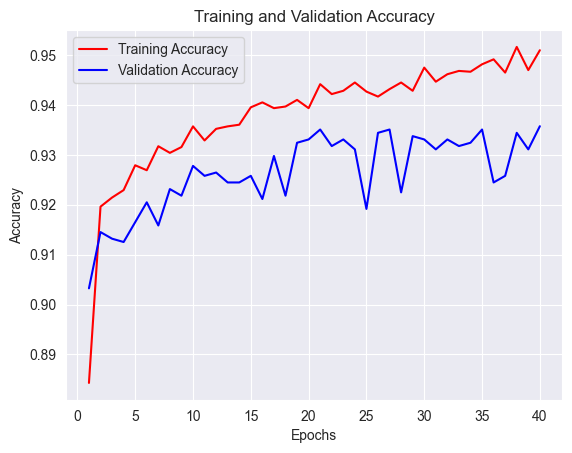

In [36]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1,len(acc)+1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

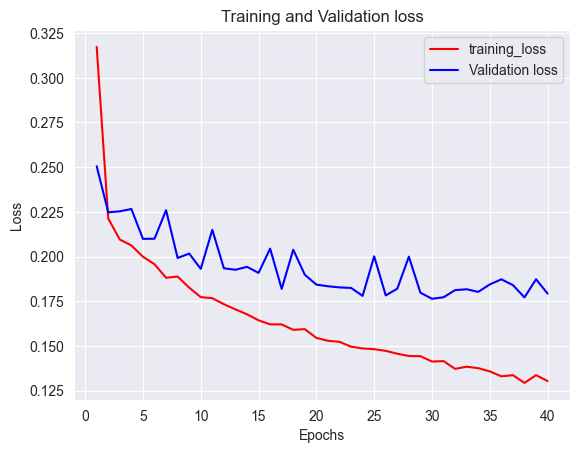

In [37]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs, loss, 'r', label='training_loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
model.save("model.keras")